In [12]:
# Load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Univariate Variable Analysis



In [13]:
data = pd.read_excel('/kaggle/input/data-train-xlsx/Data_Train.xlsx')
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


## Basic Data Analysis




## Feature Engineering



In [15]:
data['Reviews'] = data['Reviews'].str.replace(' out of 5 stars', '').astype(float)
data['Ratings'] = data['Ratings'].str.replace('customer reviews', '')
data['Ratings'] = data['Ratings'].str.replace('customer review', '')
data['Ratings'] = data['Ratings'].str.replace(',', '')
data['Ratings'] = data['Ratings'].astype(float)
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [16]:

data['Type'] = None
data['Release_Year'] = None

for index, row in data.iterrows():
  type = row['Edition'].split(',')[0]
  year = row['Edition'][-4:]
  data.at[index, 'Type'] = type
  data.at[index, 'Release_Year'] = year
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type,Release_Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006


In [17]:
data['Type'].value_counts()

Type
Paperback                4741
Hardcover                 750
Mass Market Paperback     148
Sheet music                22
Flexibound                 14
Cards                       7
Spiral-bound                4
Loose Leaf                  2
Tankobon Softcover          2
Product Bundle              1
Leather Bound               1
(German)                    1
Library Binding             1
Board book                  1
(Kannada)                   1
Perfect Paperback           1
Plastic Comb                1
(French)                    1
Name: count, dtype: int64

## Basic Data Analysis

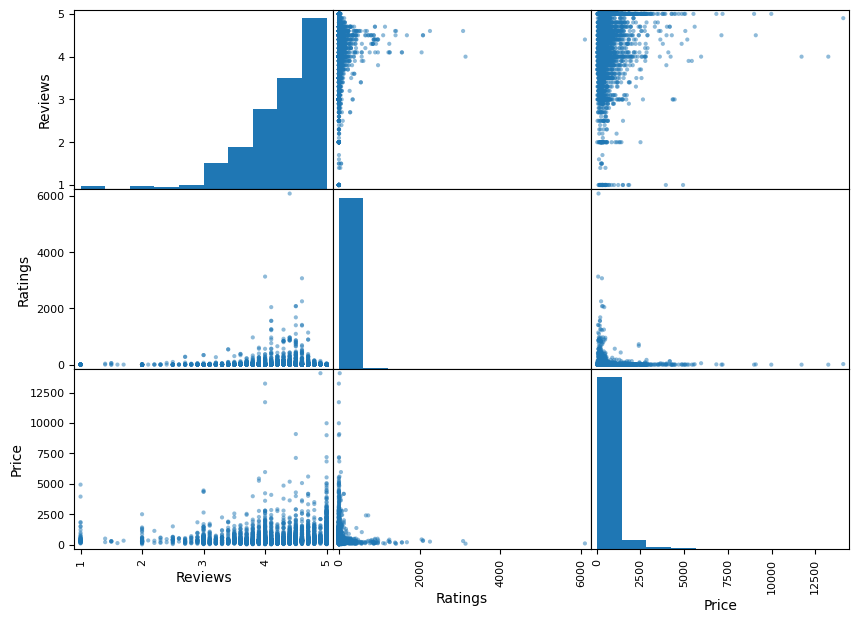

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['Reviews', 'Ratings', 'Price']
scatter_matrix(data[attributes], figsize=(10, 7))
plt.show()

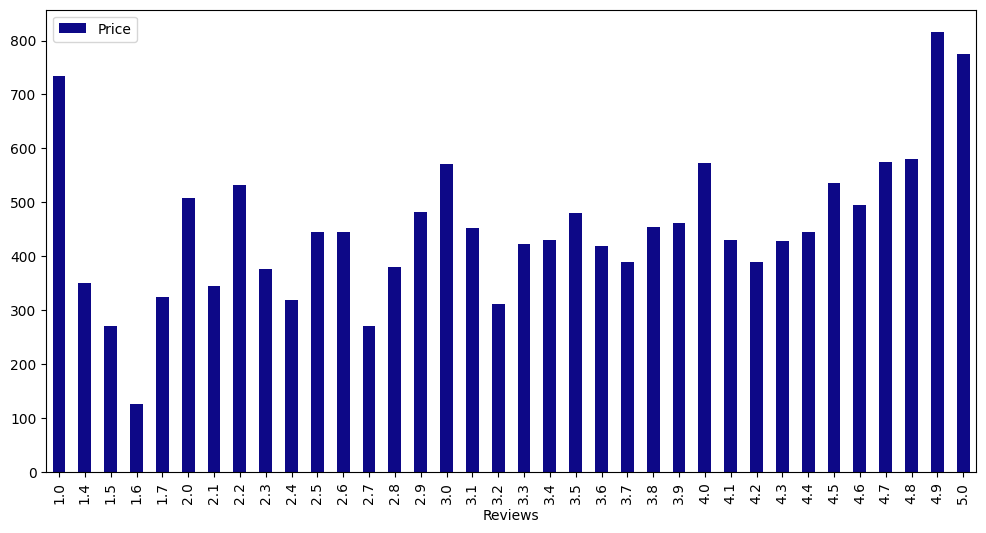

In [19]:
df = pd.concat([data['Reviews'], data['Price']], axis=1)
df.groupby(['Reviews']).mean().plot(kind='bar', y='Price', figsize=(12, 6), colormap='plasma')
plt.show()

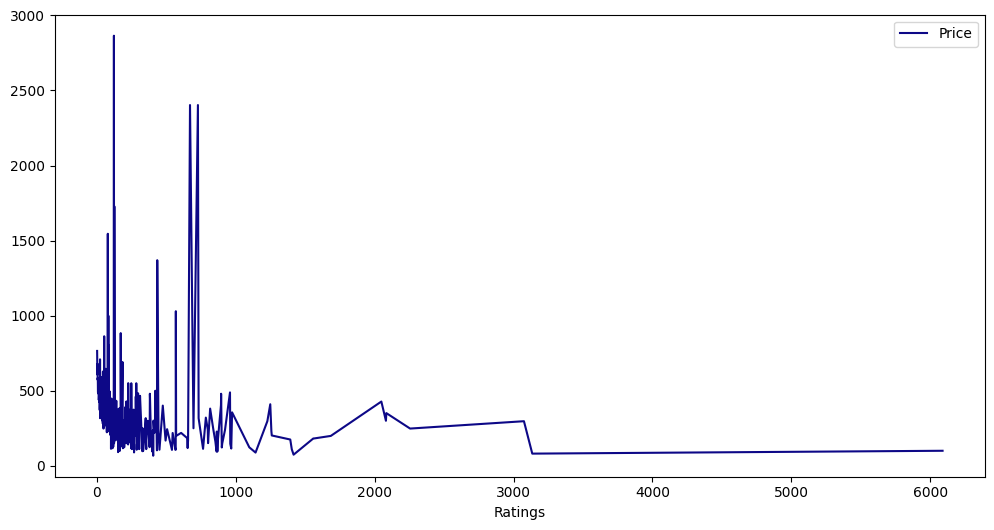

In [20]:
df = pd.concat([data['Ratings'], data['Price']], axis=1)
df.groupby(['Ratings']).mean().plot(kind='line', y='Price', figsize=(12, 6), colormap='plasma')
plt.show()

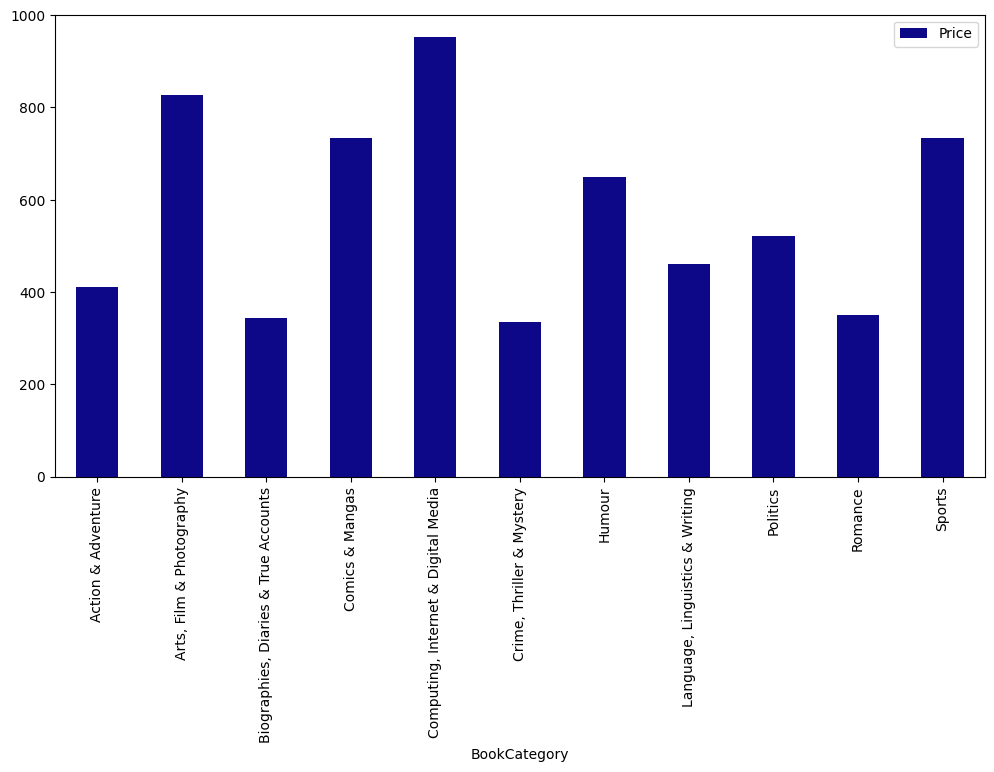

In [34]:
df = pd.concat([data['BookCategory'], data['Price']], axis=1)
df.groupby(['BookCategory']).mean().plot(kind='bar', y='Price', figsize=(12, 6), colormap='plasma')
plt.show()

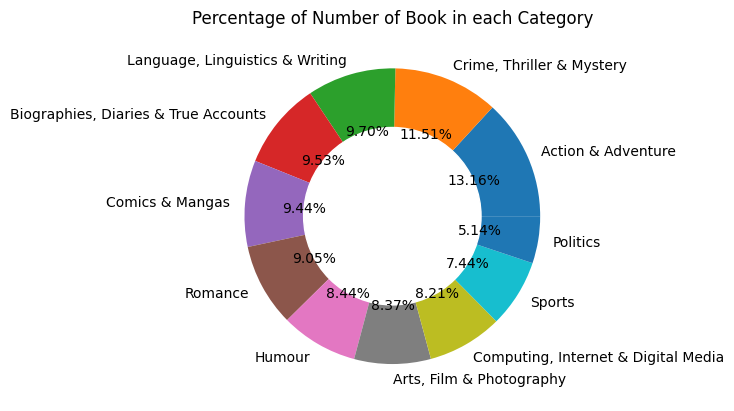

In [44]:
category = pd.DataFrame(data.groupby(['BookCategory']).size()).reset_index()
category = category.rename(columns={0: 'NumberOfBook'})
sorted_category = category.sort_values(by=['NumberOfBook'], ascending=False)
plt.pie(data['BookCategory'].value_counts().values, labels=sorted_category['BookCategory'], autopct='%.2f%%')

plt.title('Percentage of Number of Book in each Category')
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

## Feature transformation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
dataX, dataY = data.drop(columns='Price'), data['Price']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=.2, random_state=42)
x_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Type,Release_Year
43,Lost in Translation,Ella Frances Sanders,"Hardcover,– 8 Jul 2015",4.5,16.0,Did you know that the Japanese have a word to ...,Linguistics (Books),"Language, Linguistics & Writing",Hardcover,2015
1891,The Cartoon Introduction to Statistics,Grady Klein,"Paperback,– 2 Jul 2013",4.8,7.0,The Cartoon Introduction to Statistics is the ...,Comics,Comics & Mangas,Paperback,2013
3195,"The Summer of Impossible Things: An uplifting,...",Rowan Coleman,"Paperback,– Import, 3 May 2018",5.0,1.0,"If you could change the past, would you?\n\n\n...",Action & Adventure (Books),Action & Adventure,Paperback,2018
3442,Complete Screenwriting Course: A complete guid...,Charles Harris,"Paperback,– 17 Oct 2014",5.0,2.0,Designed to take you from the moment you first...,Writing Guides (Books),Humour,Paperback,2014
4990,GATE and PGECET for Computer Science and Infor...,Ramaiah D,"Paperback,– 2014",3.5,7.0,"align=center>Useful for Campus Recruitments, U...",Computer Science Books,"Computing, Internet & Digital Media",Paperback,2014


In [24]:
x_train['New_Synopsis'] = x_train['Title'] + ' ' + x_train['Author'] + ' ' + x_train['Genre'] + ' ' + x_train['BookCategory'] + ' ' + x_train['Synopsis'] + ' ' + x_train['Type']
x_train = x_train.drop(columns=['Title', 'Author', 'Genre', 'BookCategory', 'Synopsis', 'Edition', 'Release_Year', 'Type'])
x_test['New_Synopsis'] = x_test['Title'] + ' ' + x_test['Author'] + ' ' + x_test['Genre'] + ' ' + x_test['BookCategory'] + ' ' + x_test['Synopsis'] + ' ' + x_test['Type']
x_test = x_test.drop(columns=['Title', 'Author', 'Genre', 'BookCategory', 'Synopsis', 'Edition', 'Release_Year', 'Type'])
x_train.head()

,Reviews,Ratings,New_Synopsis
43,4.5,16.0,Lost in Translation Ella Frances Sanders Lingu...
1891,4.8,7.0,The Cartoon Introduction to Statistics Grady K...
3195,5.0,1.0,"The Summer of Impossible Things: An uplifting,..."
3442,5.0,2.0,Complete Screenwriting Course: A complete guid...
4990,3.5,7.0,GATE and PGECET for Computer Science and Infor...


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tf_idf = TfidfVectorizer()
vector = tf_idf.fit_transform(x_train['New_Synopsis'])
vector = pd.DataFrame(vector.toarray(), index=x_train.index, columns=tf_idf.get_feature_names_out())
vector

,00,000,0000,003,007,007s,01,02,03,04,...,रख,रचल,रण,रस,लचस,वर,शब,सकत,सभ,सह
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
vector2 = tf_idf.transform(x_test['New_Synopsis'])

In [28]:
vector2 = pd.DataFrame(vector2.toarray(), index=x_test.index, columns=tf_idf.get_feature_names_out())

In [29]:
testData = pd.concat([x_test, vector2], axis=1)
testData = testData.drop(columns='New_Synopsis')

trainData = pd.concat([x_train, vector], axis=1)
trainData = trainData.drop(columns='New_Synopsis')
trainData.head()

,Reviews,Ratings,00,000,0000,003,007,007s,01,02,...,रख,रचल,रण,रस,लचस,वर,शब,सकत,सभ,सह
43,4.5,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1891,4.8,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3195,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3442,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4990,3.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=1024, random_state=42)
trainData = pca.fit_transform(trainData)

testData = pca.transform(testData)

## Modeling

Do not change this part of the code only run it!

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)

    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return mse_train, mse_test


In [33]:
mse_train, mse_test = train(X_train=trainData , y_train=y_train , X_test=testData , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 59116.398928497634 // Test mse is: 301326.4131548772


## Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.